In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import signal
import os
import sys
import pickle
# Add the function directory to the path
sys.path.append('/home/jiarong/research/postprocessing/functions/')

Text(0.5, 1, 'U_x contour at z = 0.5')

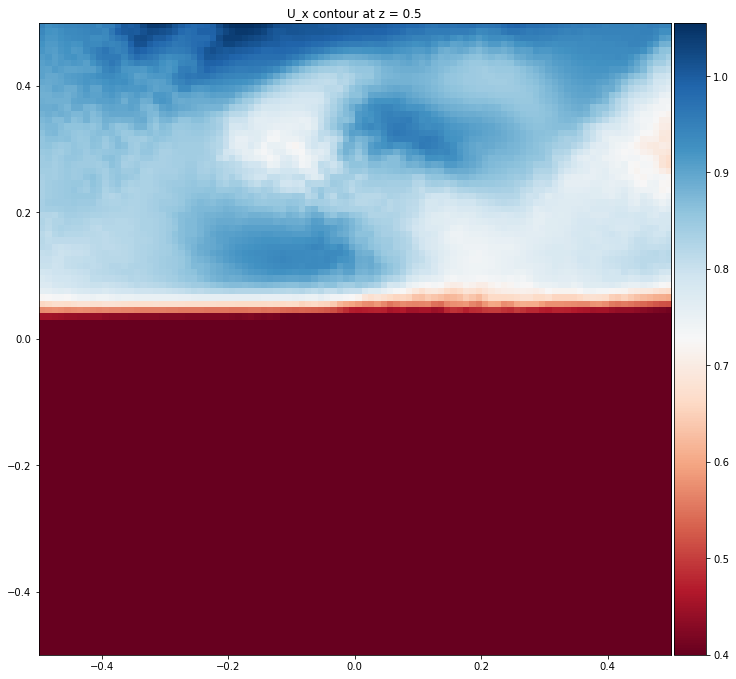

In [3]:
from slicing import SlicingInterp
os.chdir('/home/jiarong/research/turbulence/preliminary_cluster/test2_stopforcing')
# pickle_in = open("field.pickle","rb")
# field = pickle.load(pickle_in)
filename = './field_direct%g' % 180
field = pd.read_table(filename, delimiter = ',')
slicer = SlicingInterp(field, dimension = 3)
field_2D = slicer.basic('z', 0.5, 1e-2, 'u.x')
# Contour plot function
from visualization import contour
fig = plt.figure(figsize = [10, 10])
ax = fig.gca()
fig.tight_layout(h_pad=1)
contour(field_2D, 'u.x', ax, fieldmin = 0.4)
ax.set_title('U_x contour at z = 0.5')

Each plane has at least 131072 points!
Each plane has at least 16384 points!
Each plane has at least 16384 points!
Each plane has at least 16327 points!
Each plane has at least 16255 points!
Each plane has at least 15601 points!
Each plane has at least 16300 points!


(0, 1)

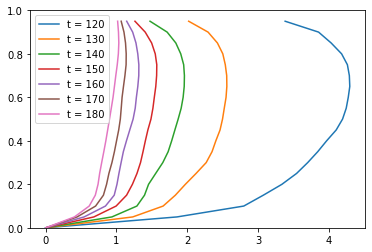

In [4]:
ts = np.arange(120,190,10)
# ts = [120, 121, 122, 140, 141, 142]
for i,t in enumerate(ts):
    filename = './field_direct%g' % t
    field = pd.read_table(filename, delimiter = ',')
    slicer = SlicingInterp(field, dimension = 3)
    y_pos = np.linspace(0, 1, 20, endpoint=False)
    ux_aver = np.zeros(len(y_pos))
    sample_size = np.zeros(len(y_pos))
    for j, y in enumerate(y_pos):
        (ux_aver[j], sample_size[j])  = slicer.average('y', y, 1e-2, 'u.x')
    plt.plot(ux_aver, y_pos, label = "t = %g" %t)
    print("Each plane has at least %g points!" % sample_size.min())
    
# field = field.iloc[1:100]
# pickle_out = open("field.pickle","wb")
# pickle.dump(field, pickle_out)
# pickle_out.close
plt.legend()
plt.ylim([0, 1])

[32768. 16384. 16384. 16375. 16378. 32748. 16375. 16372. 16375. 16372.
 32712. 16360. 16360. 16360. 16342. 32736. 16375. 16381. 16378. 16300.]
[32768. 16384. 16384. 16384. 16381. 32740. 16378. 16369. 16363. 16369.
 32720. 16360. 16300. 16354. 16321. 32676. 16369. 16369. 16375. 16336.]
[32768. 16384. 16384. 16384. 16381. 32748. 16372. 16381. 16378. 16366.
 32720. 16351. 16315. 16315. 16351. 32712. 16384. 16384. 16381. 16381.]
[32768. 16384. 16384. 16381. 16372. 32684. 16342. 16357. 16366. 16372.
 32692. 16339. 16324. 16342. 16363. 32736. 16381. 16384. 16381. 16345.]


(0, 1)

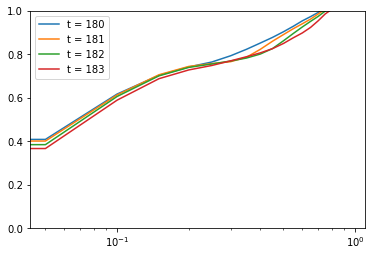

In [13]:
ts = np.arange(180,184)
# ts = [120, 121, 122, 140, 141, 142]
for i,t in enumerate(ts):
    filename = './field_direct%g' % t
    field = pd.read_table(filename, delimiter = ',')
    slicer = SlicingInterp(field, dimension = 3)
    y_pos = np.linspace(0, 1, 20, endpoint=False)
    ux_aver = np.zeros(len(y_pos))
    sample_size = np.zeros(len(y_pos))
    for j, y in enumerate(y_pos):
        (ux_aver[j], sample_size[j])  = slicer.average('y', y, 10e-3, 'u.x')
    plt.plot(y_pos, ux_aver, label = "t = %g" %t)
    print(sample_size)
    
# field = field.iloc[1:100]
# pickle_out = open("field.pickle","wb")
# pickle.dump(field, pickle_out)
# pickle_out.close
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.ylim([0, 1])

Adding the forcing term:

In [19]:
os.chdir('/home/jiarong/research/turbulence')
stats1 = pd.read_table('./preliminary_cluster/test2_stopforcing/stats.dat', delimiter = ' ', names = ['t', 'dissipation', 'energy', 'Reynolds'], error_bad_lines=False)
stats1.drop(stats1.tail(1).index,inplace=True)
print(stats1.size)
stats1_restore = pd.read_table('./preliminary_cluster/stats_restore.dat', delimiter = ' ', names = ['t', 'dissipation', 'energy', 'Reynolds'], error_bad_lines=False)
stats1_restore.drop(stats1_restore.tail(1).index,inplace=True)
print(stats1_restore.size)
stats1 = stats1.append(stats1_restore, ignore_index=True) # notice that the append method doesn't work in place
print(stats1.size)
stats2 = pd.read_table('./preliminary_cluster/stats.dat', delimiter = ' ', names = ['t', 'dissipation', 'energy', 'Reynolds'], error_bad_lines=False)
stats2.drop(stats2.tail(1).index,inplace=True)

304348
232444
536792


Text(0, 0.5, 'Energy')

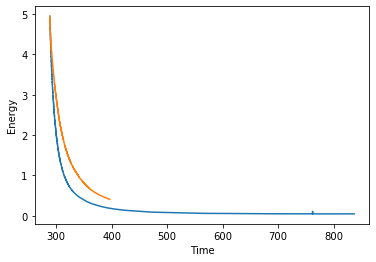

In [20]:
plt.plot(stats1.t, stats1.energy)
# plt.plot(stats1_restore.t, stats1_restore.energy)
plt.plot(stats2.t, stats2.energy)
plt.xlabel('Time')
plt.ylabel('Energy')

Text(0, 0.5, 'Dissipation')

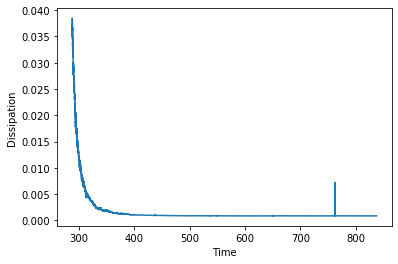

In [21]:
plt.plot(stats1.t, stats1.dissipation)
plt.xlabel('Time')
plt.ylabel('Dissipation')

Text(0, 0.5, 'Reynolds')

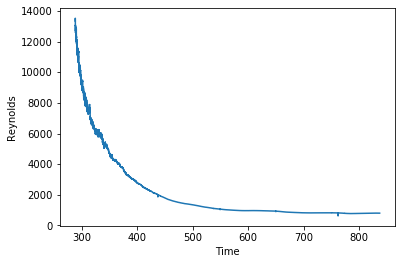

In [22]:
plt.plot(stats1.t, stats1.Reynolds)
plt.xlabel('Time')
plt.ylabel('Reynolds')